In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import joblib

In [51]:
df = pd.read_csv("diabetes.csv")

In [52]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [36]:
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_replace:
    df[col] = df[col].replace(0, df[col].median())

In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB
None


In [5]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [7]:
print(df['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


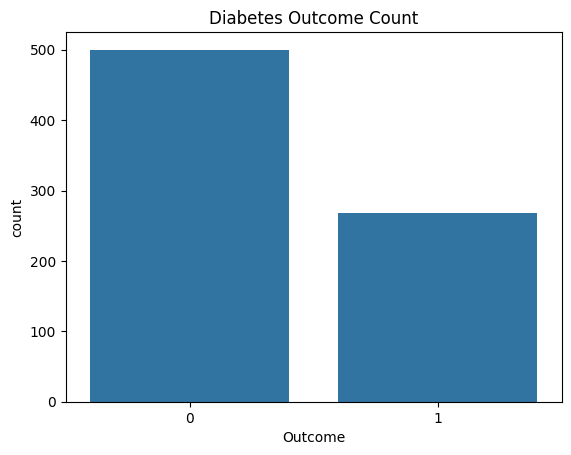

In [15]:
sns.countplot(data=df, x='Outcome')
plt.title("Diabetes Outcome Count")
plt.show()

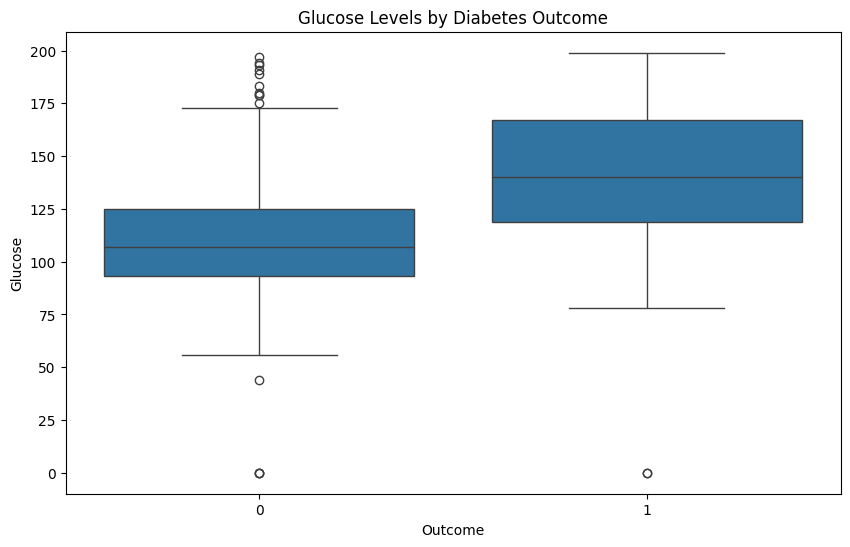

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Outcome', y='Glucose')
plt.title("Glucose Levels by Diabetes Outcome")
plt.show()

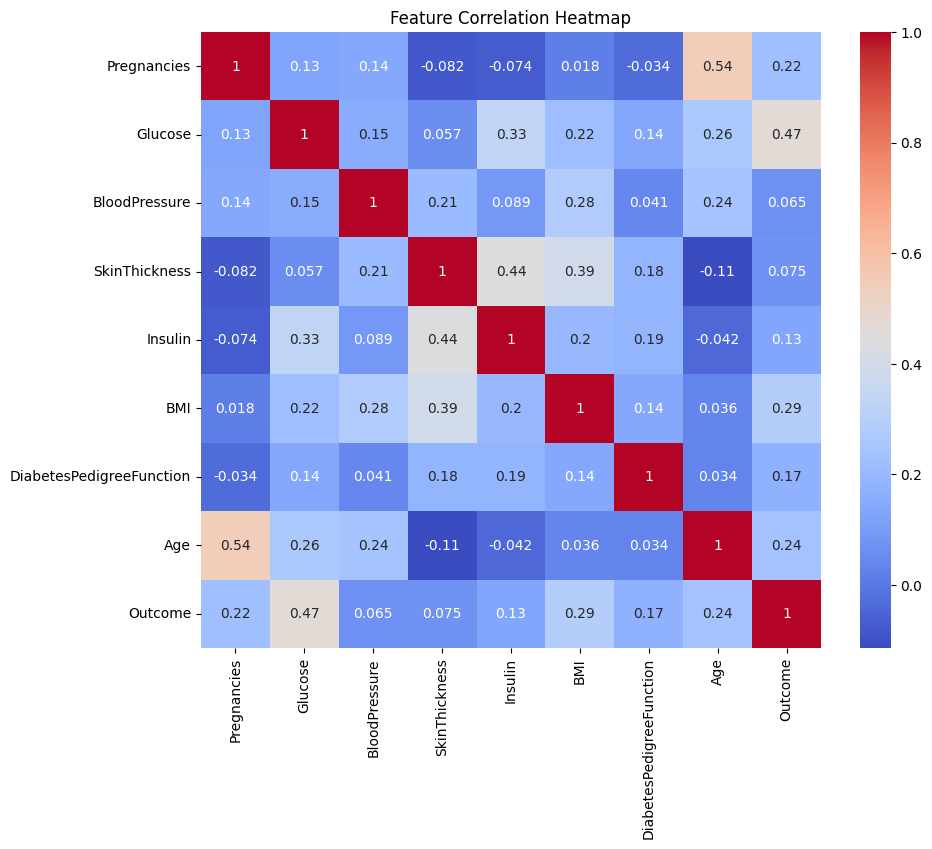

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [19]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'SVM': SVC(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier( eval_metric='logloss')
}


In [58]:
accuracies = {}

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear'],
        'class_weight': ['balanced']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'class_weight': ['balanced']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5],
        'class_weight': ['balanced']
    },
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [5, 10],
        'class_weight': ['balanced']
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.1]
    }
}

In [55]:
from sklearn.base import clone


In [62]:
for name, model in models.items():
    print(f"\n--- Tuning and Training {name} ---")
    grid = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"Best Params: {grid.best_params_}")
    print(f"Accuracy: {acc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=cv)
    print(f"Cross-validated Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # Update with tuned model
    models[name] = best_model


--- Tuning and Training Logistic Regression ---
Best Params: {'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}
Accuracy: 0.6948
[[67 32]
 [15 40]]
              precision    recall  f1-score   support

           0       0.82      0.68      0.74        99
           1       0.56      0.73      0.63        55

    accuracy                           0.69       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.69      0.70       154

Cross-validated Accuracy: 0.7590 ± 0.0254

--- Tuning and Training SVM ---
Best Params: {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear'}
Accuracy: 0.7013
[[68 31]
 [15 40]]
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        99
           1       0.56      0.73      0.63        55

    accuracy                           0.70       154
   macro avg       0.69      0.71      0.69       154
weighted avg       0.73      0.70      0.71       154

Cro

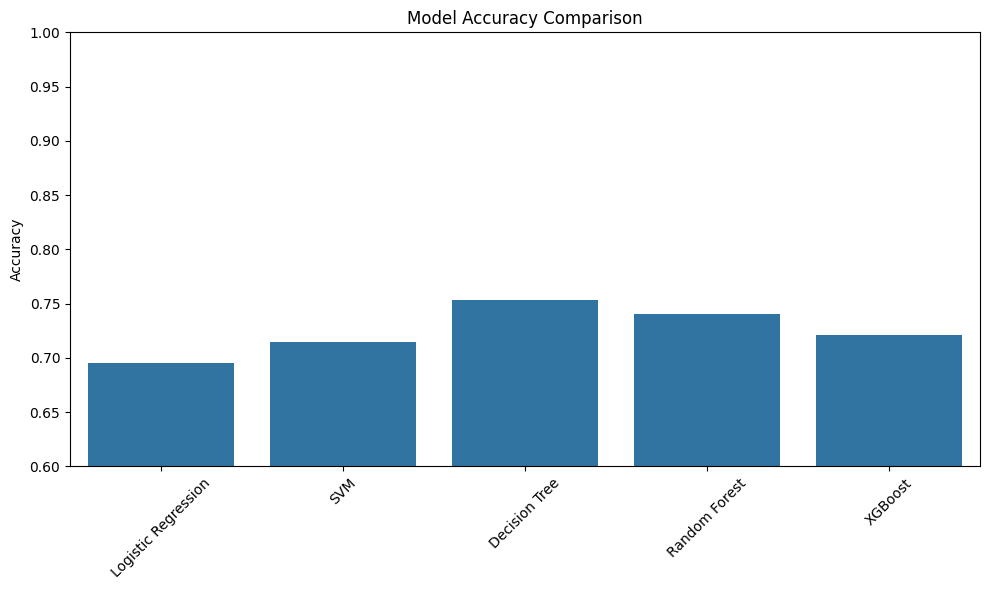

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0.6, 1.0)
plt.tight_layout()
plt.show()

In [65]:
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
joblib.dump(best_model, "best_diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print(f"\nBest model: {best_model_name} saved as best_diabetes_model.pkl along with scaler.")



Best model: Decision Tree saved as best_diabetes_model.pkl along with scaler.


In [66]:
def predict_diabetes(input_data):
    model = joblib.load("best_diabetes_model.pkl")
    scaler = joblib.load("scaler.pkl")
    input_df = pd.DataFrame([input_data], columns=X.columns)
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)[0]
    return "Diabetic" if prediction == 1 else "Not Diabetic"

In [67]:
sample_input = {
    'Pregnancies': 2,
    'Glucose': 130,
    'BloodPressure': 80,
    'SkinThickness': 25,
    'Insulin': 100,
    'BMI': 28.0,
    'DiabetesPedigreeFunction': 0.5,
    'Age': 32
}

print(predict_diabetes(sample_input))


Not Diabetic


In [68]:
sample_input = {
    'Pregnancies': 3,
    'Glucose': 165,
    'BloodPressure': 72,
    'SkinThickness': 30,
    'Insulin': 140,
    'BMI': 35.5,
    'DiabetesPedigreeFunction': 0.8,
    'Age': 45
}

print(predict_diabetes(sample_input))

Diabetic


In [70]:
sample_input = {
    'Pregnancies': 2,
    'Glucose': 155,
    'BloodPressure': 78,
    'SkinThickness': 28,
    'Insulin': 200,
    'BMI': 34.2,
    'DiabetesPedigreeFunction': 0.6,
    'Age': 60
}
print(predict_diabetes(sample_input))

Diabetic
